In [1]:
# notebook settings
%load_ext autoreload
%autoreload 2

# external imports
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as grb

# internal imports
from pympc.geometry.polyhedron import Polyhedron

In [2]:
# polyhedral family parameters
nx = 2
nP = 3
nA = 10
r = 5.

In [3]:
# collection of polytopes
P = []
for i in range(nP):
    A = np.random.randn(nA, nx)
    offset = np.random.rand(nx, 1)*r - np.ones((nx, 1))*r/2.
    b = np.random.rand(nA, 1) + A.dot(offset)
    Pi = Polyhedron(A, b)
    Pi.remove_redundant_inequalities()
    P.append(Pi)

In [4]:
def plot_polytopes(P):
    for i, Pi in enumerate(P):
        Pi.plot(label=r'$\mathcal{P}_'+str(i+1)+'$', facecolor=np.random.rand(3))
        plt.legend()

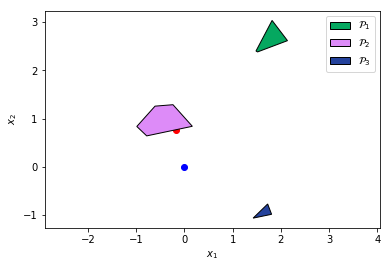

In [5]:
# convex-hull reformulation (MIQP)
model = grb.Model()
lb = [-grb.GRB.INFINITY]*nx
x = np.array([model.addVars(nx, lb=lb)[k] for k in range(nx)])
x_aux = [np.array([model.addVars(nx, lb=lb)[k] for k in range(nx)]) for i in range(nP)]
d = [model.addVars(1, vtype='B')[0] for i in range(nP)]
model.update()
for i, Pi in enumerate(P):
    for j in range(Pi.A.shape[0]):
        model.addConstr(Pi.A[j].dot(x_aux[i]) <= Pi.b[j,0]*d[i])
model.addConstr(sum(d) == 1.)
for k in range(nx):
    model.addConstr(sum(xi[k] for xi in x_aux) == x[k])
model.setObjective(x.dot(x))
model.setParam('OutputFlag', 0)
model.optimize()
x = np.vstack([xk.x for xk in x])

# plot
plot_polytopes(P)
plt.scatter(0.,0., color='blue')
plt.scatter(x[0], x[1], color='red')
plt.axis('equal')
plt.show()

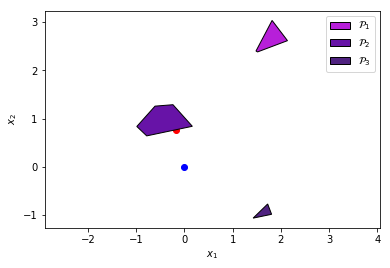

In [6]:
# model set-up
model = grb.Model()

# model decision variables
x = np.array([model.addVars(nx, lb=[-grb.GRB.INFINITY]*nx)[k] for k in range(nx)])
x_aux = [np.array([model.addVars(nx, lb=lb)[k] for k in range(nx)]) for i in range(nP)]
s = model.addVars(1)[0]
s_aux = [model.addVars(1)[0] for i in range(nP)]
d = [model.addVars(1)[0] for i in range(nP)]
model.update()

# constraints
for i, Pi in enumerate(P):
    for j in range(Pi.A.shape[0]):
        model.addConstr(Pi.A[j].dot(x_aux[i]) <= Pi.b[j,0]*d[i])
for i, xi in enumerate(x_aux):
    model.addConstr(d[i]*s_aux[i] >= xi.dot(xi))
model.addConstr(sum(d) == 1.)
for k in range(nx):
    model.addConstr(sum(xi[k] for xi in x_aux) == x[k])
model.addConstr(sum(si for si in s_aux) == s)

model.setObjective(s)
model.setParam('OutputFlag', 0)
model.optimize()
x = np.vstack([xk.x for xk in x])

# plot
plot_polytopes(P)
plt.scatter(0.,0., color='blue')
plt.scatter(x[0], x[1], color='red')
plt.axis('equal')
plt.show()

[[6.051638167231329e-09, 3.6964661761175282e-09], [-0.16285771727126055, 0.7744712261283541], [2.586017846894085e-09, -1.9256815571915653e-09]]


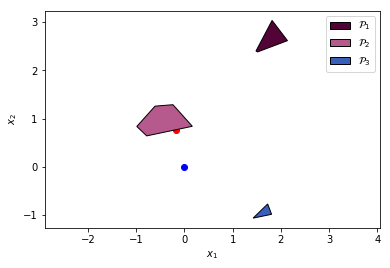

In [7]:
# model set-up
model = grb.Model()

# model decision variables
x = np.array([model.addVars(nx, lb=[-grb.GRB.INFINITY]*nx)[k] for k in range(nx)])
x_aux = [np.array([model.addVars(nx, lb=lb)[k] for k in range(nx)]) for i in range(nP)]
s = model.addVars(1)[0]
s_aux = [model.addVars(1)[0] for i in range(nP)]
d = [model.addVars(1)[0] for i in range(nP)]
model.update()

# constraints
for i, Pi in enumerate(P):
    for j in range(Pi.A.shape[0]):
        model.addConstr(Pi.A[j].dot(x_aux[i]) <= Pi.b[j,0]*d[i])
for i, xi in enumerate(x_aux):
    model.addConstr(d[i]*s_aux[i] >= xi.dot(xi))
model.addConstr(sum(d) == 1.)
for k in range(nx):
    model.addConstr(sum(xi[k] for xi in x_aux) == x[k])
model.addConstr(sum(si for si in s_aux) == s)

model.setObjective(s)
#     sum([xi.dot(xi) for xi in x_aux])
#     )
model.setParam('OutputFlag', 0)
model.optimize()
x = np.vstack([xk.x for xk in x])
print [[xi[k].x for k in range(nx)] for xi in x_aux]

# plot
plot_polytopes(P)
plt.scatter(0.,0., color='blue')
plt.scatter(x[0], x[1], color='red')
plt.axis('equal')
plt.show()